In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/ecommerce_loja_simples.csv')

In [ ]:
df.head(5)

ID_Pedido  Data_Venda    Categoria           Produto  Quantidade  \
0       1000  2025-04-22  Eletrônicos    Fone de ouvido           3   
1       1001  2025-01-08  Eletrônicos      Caixa de som           4   
2       1002  2025-04-20         Moda              Boné           5   
3       1003  2025-01-13       Beleza  Creme hidratante           4   
4       1004  2024-12-17       Beleza           Perfume           3   

   Preco_Unitario Cliente_ID             Cidade Estado Forma_Pagamento  
0          137.55       C053  Caldeira de Nunes     BA          Boleto  
1           35.26       C112     Farias da Mata     MA          Cartão  
2           32.74       C280   Moura de Cardoso     PI          Boleto  
3          302.85       C082            Ribeiro     SC          Cartão  
4           94.63       C053    Freitas da Mata     RJ             Pix

In [ ]:
df.dtypes

ID_Pedido            int64
Data_Venda          object
Categoria           object
Produto             object
Quantidade           int64
Preco_Unitario     float64
Cliente_ID          object
Cidade              object
Estado              object
Forma_Pagamento     object
dtype: object

In [ ]:
df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])

In [ ]:
df.isnull().sum()

ID_Pedido          0
Data_Venda         0
Categoria          0
Produto            0
Quantidade         0
Preco_Unitario     0
Cliente_ID         0
Cidade             0
Estado             0
Forma_Pagamento    0
dtype: int64

In [ ]:
df.shape

(500, 10)

In [ ]:
#Calcular coluna Receita
df['Receita'] = df['Quantidade'] * df['Preco_Unitario']

**Analise Exploratória de Dados**

KPISs iniciais

In [ ]:
#total vendas
df['Receita'].sum()

np.float64(391323.05000000005)

In [ ]:
#total_pedidos
df['ID_Pedido'].nunique()

500

In [ ]:
#Clientes unicos
df['Cliente_ID'].nunique()

242

In [ ]:
#Vendas por Categoria
df.groupby('Categoria')['Receita'].sum().sort_values(ascending=False)

Categoria
Moda           104035.43
Casa           103120.59
Beleza          98712.19
Eletrônicos     85454.84
Name: Receita, dtype: float64

In [ ]:
#Produtos mais vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Tênis                93
Boné                 90
Conjunto de copos    90
Shampoo              90
Sabonete líquido     85
Perfume              83
Maquiagem            78
Jaqueta              76
Toalha               75
Lençol               75
Caixa de som         75
Calça Jeans          74
Aspirador de pó      69
Carregador           66
Jogo de panelas      66
Fone de ouvido       66
Teclado              66
Mouse                64
Creme hidratante     57
Camiseta             56
Name: Quantidade, dtype: int64

In [ ]:
#Vendas por estado
df.groupby('Estado')['Receita'].sum().sort_values(ascending=False)

Estado
AP    21805.05
PR    20122.43
CE    19910.48
DF    19830.66
MS    19138.99
AL    18143.12
RJ    17952.07
MG    17715.66
RO    17139.25
RN    15622.02
MT    15563.32
SC    15475.18
RS    14415.20
BA    14368.69
PI    14108.77
SP    14047.16
AC    13747.19
PA    12566.32
PE    12255.03
SE    11161.26
RR    11044.47
AM    10454.07
GO     9775.11
TO     9452.60
PB     9073.96
MA     8795.45
ES     7639.54
Name: Receita, dtype: float64

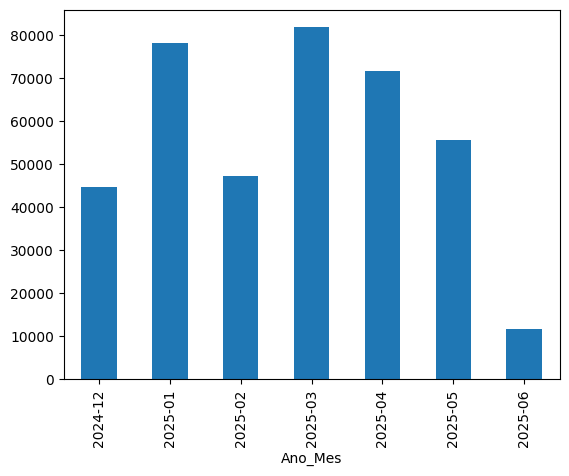

In [ ]:
#Sazonalidade (vendas por mês)
df['Ano_Mes'] = df['Data_Venda'].dt.to_period('M')
df.groupby('Ano_Mes')['Receita'].sum().plot(kind='bar');